## **PACE: Plan Stage**
**What are the data columns and variables and which ones are most relevant to your deliverable?**

The dataset includes variables such as `drives`, `n_days_after_onboarding`, `activity_days`, `driving_days`, `driven_km_drives`, etc.

**What units are your variables in?**

Dates are in YYYY-MM-DD format.

Categorical data such as subscription_type and region are in string format.

**What are your initial presumptions about the data that can inform your EDA, knowing you will need to confirm or deny with your future findings?**
Initial assumptions:

Users with lower session counts and shorter session durations are more likely to churn.

Premium users are less likely to churn than free-tier users.

Certain regions may have higher churn due to lower feature availability or connectivity issues.

**Is there any missing or incomplete data?**
Yes, some missing values were found in average_session_duration and region. These will need to be cleaned or imputed depending on the percentage of missing data.

**Are all pieces of this dataset in the same format?**
Mostly yes, but some date columns need conversion to datetime format. There may also be inconsistencies in text fields (e.g., capitalization in region or subscription_type).

**Which EDA practices will be required to begin this project?**
Initial practices will include:

Descriptive statistics

Data type conversions

Handling missing values

Creating histograms, bar charts, and boxplots

Correlation analysis

Grouping and aggregating data for churned vs. non-churned users


## **PACE: Analyze Stage**
**What steps need to be taken to perform EDA in the most effective way to achieve the project goal?**

Clean the data (handle missing values, fix data types)

Explore distributions and summary stats

Segment users by subscription type and churn status

Visualize engagement metrics over time

Compare metrics between churned and retained users

**Do you need to add more data using the EDA practice of joining? What type of structuring needs to be done to this dataset, such as filtering, sorting, etc.?**
    
No external datasets are needed, but internal structuring includes:

Filtering to remove outliers and inactive users

Sorting by activity level or churn status

Aggregating metrics by user groups (e.g., by region or subscription)

**What initial assumptions do you have about the types of visualizations that might best be suited for the intended audience?**

Bar charts and pie charts to show churn distribution

Box plots for comparing session durations across groups

Line graphs for time-series analysis

Heatmaps for correlations

## **PACE: Construct Stage**
**What data visualizations, machine learning algorithms, or other data outputs will need to be built in order to complete the project goals?**

Visualizations: bar charts, histograms, boxplots, pie charts, line graphs

Data outputs: summary tables, user segmentation

(Optional) Predictive model for churn if extending the project

**What processes need to be performed in order to build the necessary data visualizations?**

Clean and prepare the data

Group and aggregate values

Use libraries like matplotlib and seaborn for plotting

Customize visual elements for readability and audience

**Which variables are most applicable for the visualizations in this data project?**

`drives`

**Going back to the Plan stage, how do you plan to deal with the missing data (if any)?**

Drop rows with critical missing fields like churned

Impute missing values for session duration using median or mean

Standardize text entries (e.g., lowercase region names)

### **Task 1. Imports and data loading**

For EDA of the data, import the data and packages that will be most helpful, such as pandas, numpy, and matplotlib.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Load the dataset
df = pd.read_csv(r'D:\5B. Google_Advanced_data_analysis\training_project_data\waze_dataset.csv')

### **Task 2. Data exploration and cleaning**

In [8]:
df.head()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android


In [9]:
df.size

194987

In [10]:
df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7499.000000,80.633776,67.281152,189.964447,1749.837789,121.605974,29.672512,4039.340921,1860.976012,15.537102,12.179879
std,4329.982679,80.699065,65.913872,136.405128,1008.513876,148.121544,45.394651,2502.149334,1446.702288,9.004655,7.824036
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000
50%,7499.000000,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000
75%,11248.500000,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000
max,14998.000000,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


### **Task 3a. Visualizations**
    
    -Box plots will be helpful to determine outliers and where the bulk of the data points reside in terms of drives, sessions and all other continuous numeric variables
        
    -Histograms are essential to understand the distribution of variables
        
    -Scatter plots will be helpful to visualize relationships between variables
        
    -Bar charts are useful for communicating levels and quantities, especially for categorical information
        
    -Begin by examining the spread and distribution of important variables using box plots and histograms.

**`sessions`**
        
*The number of occurrences of a user opening the app during the month*

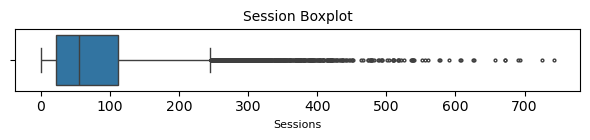

In [13]:
# Box plot
plt.figure(figsize=(6, 1.5))  # Slightly taller to fit outliers
sns.boxplot(x=df['sessions'], fliersize=2, linewidth=1)
plt.title('Session Boxplot', fontsize=10)
plt.xlabel('Sessions', fontsize=8)
plt.tight_layout()
plt.show()


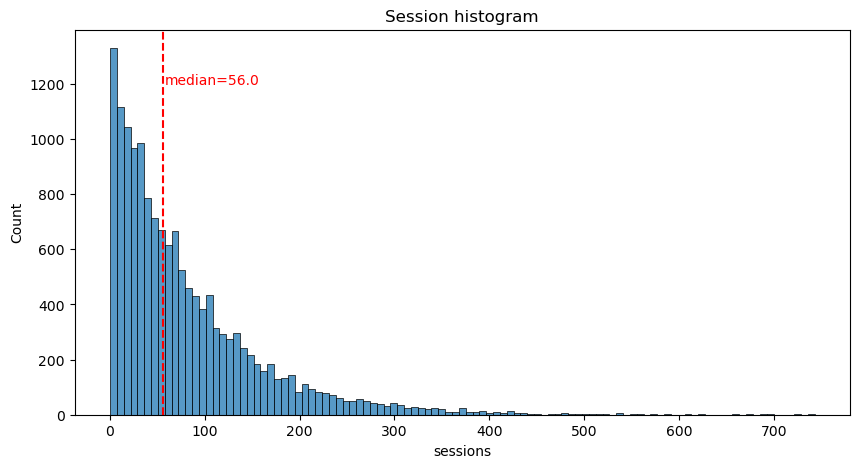

In [14]:
# Histogram
plt.figure(figsize=(10,5))
ax = sns.histplot(df['sessions'], kde=False)

# Calculate the median
median = df['sessions'].median()

# Add the red vertical line for the median
ax.axvline(median, color='red', linestyle='--')

# Adjust text position based on the plot data
ax.text(median+2, 1200, f'median={median}', color='red')

# Set plot title
plt.title('Session histogram')

# Display the plot
plt.show()

The `sessions` variable is a right-skewed distribution with half of the observations having 56 or fewer sessions. However, as indicated by the boxplot, some users have more than 700.

**`drives`**

*An occurrence of driving at least 1 km during the month*

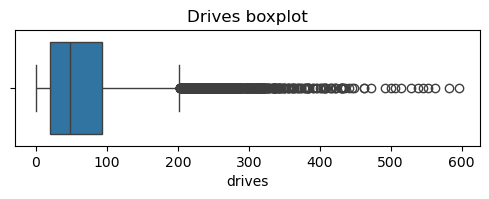

In [18]:
# Box plot
plt.figure(figsize=(6,1.5))
ax = sns.boxplot(x = df['drives'])
plt.title('Drives boxplot')
plt.show()

In [19]:
# Helper function to plot histograms based on the
# format of the `sessions` histogram
def histogrammer(column_str, median_text=True, **kwargs):    # **kwargs = any keyword arguments
                                                             # from the sns.histplot() function
    median=round(df[column_str].median(), 1)
    plt.figure(figsize=(5,3))
    ax = sns.histplot(x=df[column_str], **kwargs)            # Plot the histogram
    plt.axvline(median, color='red', linestyle='--')         # Plot the median line
    if median_text==True:                                    # Add median text unless set to False
        ax.text(0.25, 0.85, f'median={median}', color='red',
            ha="left", va="top", transform=ax.transAxes)
    else:
        print('Median:', median)
    plt.title(f'{column_str} histogram');

*The following code block defines a function that helps plot histograms with a particular style/format using this particular dataset.*

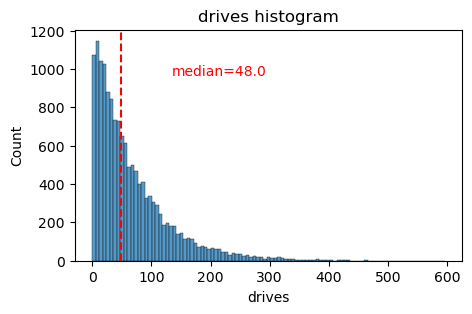

In [21]:
# Histogram
histogrammer('drives')

The `drives` information follows a distribution similar to the sessions variable. It is right-skewed, approximately log-normal, with a median of 48. However, some drivers had over 400 drives in the last month.

**`total_sessions`**

*A model estimate of the total number of sessions since a user has onboarded*

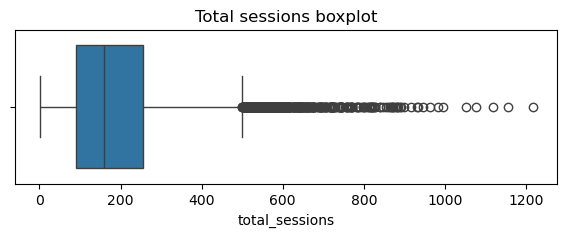

In [25]:
 # Box plot
plt.figure(figsize=(7,2))
ax = sns.boxplot(x = df['total_sessions'])
plt.title('Total sessions boxplot')
plt.show()

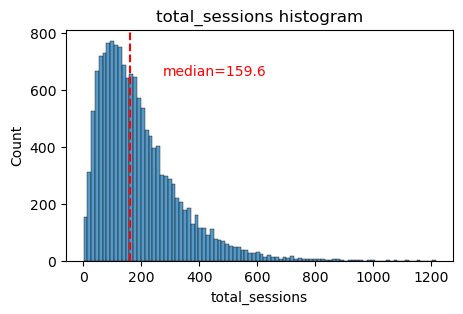

In [26]:
# Histogram
histogrammer('total_sessions')

The `total_sessions` is a right-skewed distribution that looks more normal than the previous variables. The median total number of sessions is 159.6. This is interesting information because, if the median number of sessions in the last month was 48 and the median total sessions was ~160, then it seems that a large proportion of a user's total drives might have taken place in the last month. This is something you can examine more closely later.

**n_days_after_onboarding**

*The number of days since a user signed up for the app*

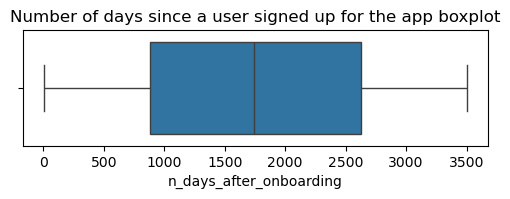

In [30]:
# Box plot
plt.figure(figsize=(6,1.5))
ax = sns.boxplot(x = df['n_days_after_onboarding'])
plt.title('Number of days since a user signed up for the app boxplot')
plt.show()

Median: 1741.0


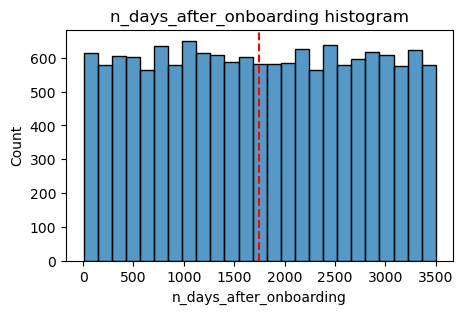

In [31]:
# Histogram
histogrammer('n_days_after_onboarding', median_text=False)

The total user tenure (i.e., number of days since onboarding) is a uniform distribution with values ranging from near-zero to ~3,500 (~9.5 years).

**`driven_km_drives`**

*Total kilometers driven during the month*

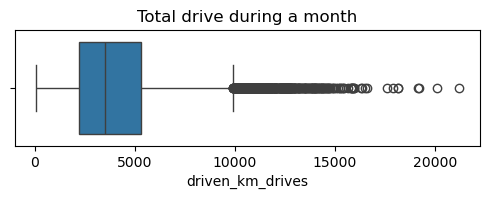

In [35]:
# Box plot
plt.figure(figsize=(6,1.5))
ax = sns.boxplot(x = df['driven_km_drives'])
plt.title('Total drive during a month')
plt.show()

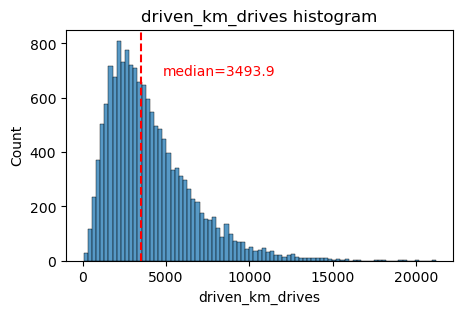

In [36]:
# Histogram
histogrammer('driven_km_drives')

The number of drives driven in the last month per user is a right-skewed distribution with half the users driving under 3,495 kilometers. The longest distance driven in the month was over half the circumferene of the earth.

**`duration_minutes_drives`**

*Total duration driven in minutes during the month*

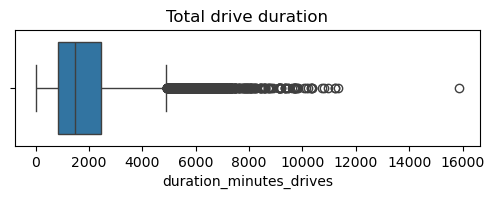

In [40]:
# Box plot
plt.figure(figsize=(6,1.5))
ax = sns.boxplot(x = df['duration_minutes_drives'])
plt.title('Total drive duration')
plt.show()

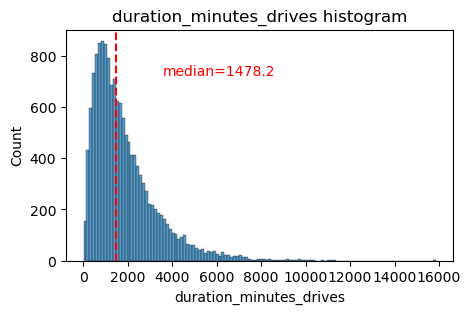

In [41]:
# Histogram
histogrammer('duration_minutes_drives')

The `duration_minutes_drives` variable has a heavily skewed right tail. Half of the users drove less than ~1,478 minutes (~25 hours), but some users clocked over 250 hours over the month.

**`activity_days`**

*Number of days the user opens the app during the month*

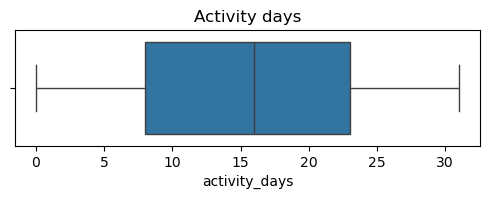

In [45]:
# Box plot
plt.figure(figsize=(6,1.5))
ax = sns.boxplot(x = df['activity_days'])
plt.title('Activity days')
plt.show()

Median: 16.0


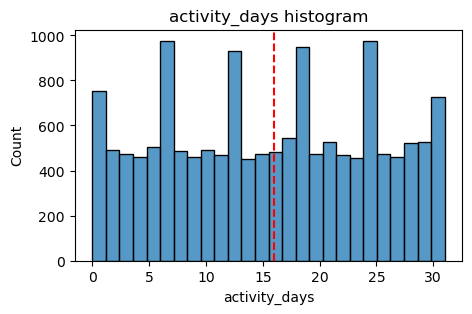

In [46]:
# Histogram
histogrammer('activity_days', median_text=False)

Within the last month, users opened the app a median of 16 times. The box plot reveals a centered distribution. The histogram shows a nearly uniform distribution of ~500 people opening the app on each count of days. However, there are ~250 people who didn't open the app at all and ~250 people who opened the app every day of the month.

This distribution is noteworthy because it does not mirror the sessions distribution, which you might think would be closely correlated with `activity_days`.

**`driving_days`**

*Number of days the user drives (at least 1 km) during the month*

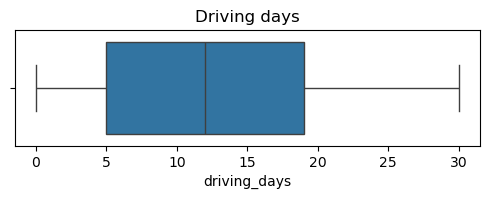

In [50]:
# Box plot
plt.figure(figsize=(6,1.5))
ax = sns.boxplot(x = df['driving_days'])
plt.title('Driving days')
plt.show()

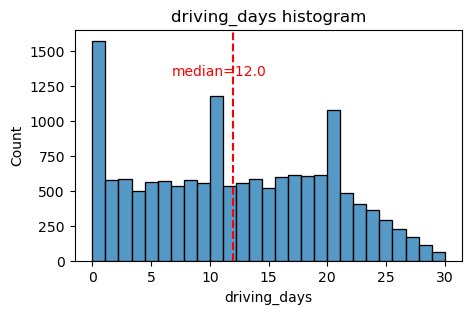

In [51]:
# Histogram
histogrammer('driving_days')

The number of days users drove each month is almost uniform, and it largely correlates with the number of days they opened the app that month, except the `driving_days` distribution tails off on the right.

However, there were almost twice as many users (~1,000 vs. ~550) who did not drive at all during the month. This might seem counterintuitive when considered together with the information from `activity_days`. That variable had ~500 users opening the app on each of most of the day counts, but there were only ~250 users who did not open the app at all during the month and ~250 users who opened the app every day.

**`device`**

*The type of device a user starts a session with*

*This is a categorical variable, so you do not plot a box plot for it. A good plot for a binary categorical variable is a pie chart.*

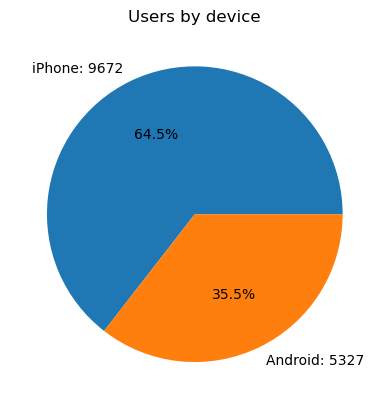

In [54]:
# Pie chart
device_data = df['device'].value_counts()
plt.pie(device_data, labels = [f'{device_data.index[0]}: {device_data.values[0]}',
                               f'{device_data.index[1]}: {device_data.values[1]}'],
                               autopct='%1.1f%%')
plt.title('Users by device')
plt.show()

There are nearly twice as many iPhone users as Android users represented in this data.

**`label`**

*Binary target variable (“retained” vs “churned”) for if a user has churned anytime during the course of the month*

*This is also a categorical variable, and as such would not be plotted as a box plot. Plot a pie chart instead.*

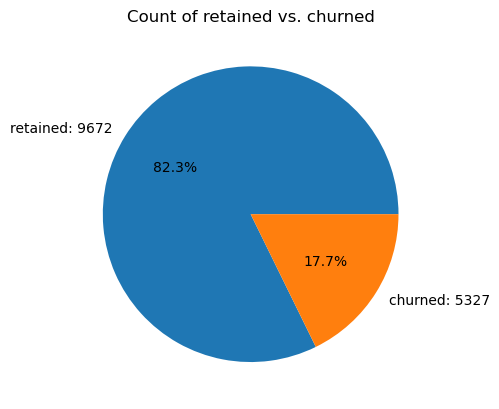

In [57]:
# Pie chart
label_data = df['label'].value_counts()
plt.pie(label_data, labels = [f'{label_data.index[0]}: {device_data.values[0]}',
                              f'{label_data.index[1]}: {device_data.values[1]}'],
                               autopct='%1.1f%%')
plt.title('Count of retained vs. churned');
plt.show()

Less than 18% of the users churned.

**`driving_days vs. activity_days`**

*Because both `driving_days` and `activity_days` represent counts of days over a month and they're also closely related, you can plot them together on a single histogram. This will help to better understand how they relate to each other without having to scroll back and forth comparing histograms in two different places.*

*Plot a histogram that, for each day, has a bar representing the counts of `driving_days` and `user_days`.*

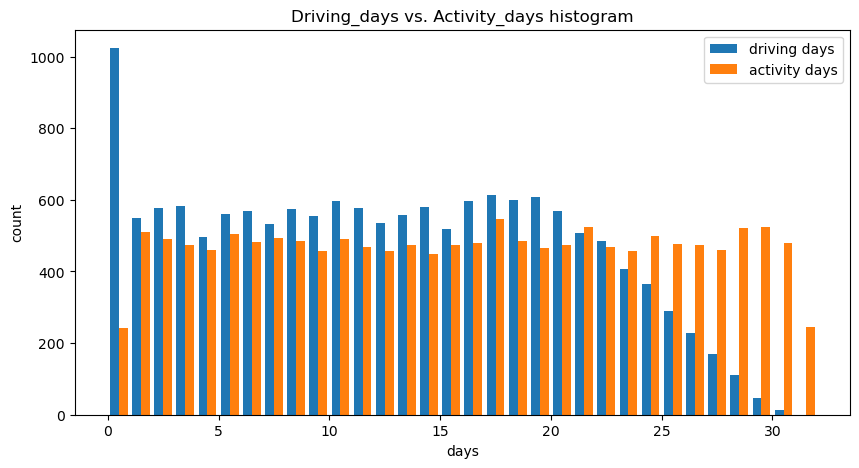

In [60]:
# Histogram
plt.figure(figsize=(10,5))
label=['driving days', 'activity days']
plt.hist([df['driving_days'], df['activity_days']], bins=range(0,33), label = label)
plt.title('Driving_days vs. Activity_days histogram')
plt.xlabel('days')
plt.ylabel('count')
plt.legend()
plt.show()

As observed previously, this might seem counterintuitive. After all, why are there *fewer* people who didn't use the app at all during the month and more people who didn't drive at all during the month?

On the other hand, it could just be illustrative of the fact that, while these variables are related to each other, they're not the same. People probably just open the app more than they use the app to drive—perhaps to check drive times or route information, to update settings, or even just by mistake.

Nonetheless, it might be worthwile to contact the data team at Waze to get more information about this, especially because it seems that the number of days in the month is not the same between variables.

Confirm the maximum number of days for each variable—`driving_days` and `activity_days`.

In [62]:
print(df['driving_days'].max())
print(df['activity_days'].max())

30
31


It's true. Although it's possible that not a single user drove all 31 days of the month, it's highly unlikely, considering there are 15,000 people represented in the dataset.

One other way to check the validity of these variables is to plot a simple scatter plot with the x-axis representing one variable and the y-axis representing the other.

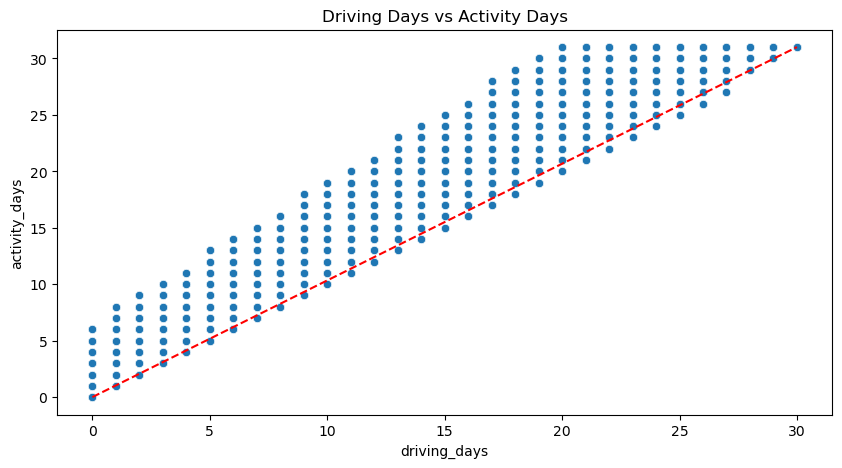

In [64]:
# Scatter plot
plt.figure(figsize=(10,5))
sns.scatterplot(x = df['driving_days'], y = df['activity_days'])
plt.title('Driving Days vs Activity Days')
plt.plot([0,30],[0,31], color='red', linestyle = '--')
plt.show()

Notice that there is a theoretical limit. If you use the app to drive, then by definition it must count as a day-use as well. In other words, you cannot have more drive-days than activity-days. None of the samples in this data violate this rule, which is good.

**`Retention by device`**
*Plot a histogram that has four bars—one for each device-label combination—to show how many iPhone users were retained/churned and how many Android users were retained/churned.*

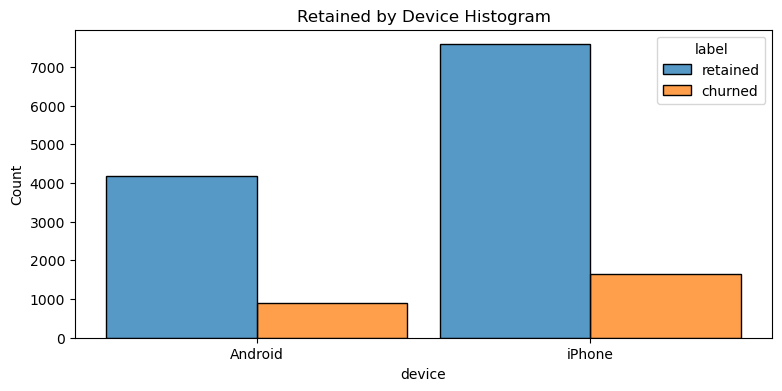

In [67]:
# Histogram
plt.figure(figsize=(9,4))
ax = sns.histplot(x=df['device'], hue=df['label'], multiple='dodge', shrink=0.9)
plt.title('Retained by Device Histogram')
plt.show()

The proportion of churned users to retained users is consistent between device types.

**`Retention by kilometers driven per driving day`**

In the previous step, we discovered that the median distance driven per driving day last month for users who churned was 608.78 km, versus 247.48 km for people who did not churn. Examine this further.

    1.Create a new column in df called `km_per_driving_day`, which represents the mean distance driven per driving day for each user.
    
    2.Call the `describe()` method on the new column.

In [70]:
# 1. Create `km_per_driving_day` column
df['km_per_driving_day'] = df['driven_km_drives']/df['driving_days']

# 2. Call `describe()` on the new column
df['km_per_driving_day'].describe()

count    1.499900e+04
mean              inf
std               NaN
min      3.022063e+00
25%      1.672804e+02
50%      3.231459e+02
75%      7.579257e+02
max               inf
Name: km_per_driving_day, dtype: float64

In [71]:
# 1. Convert infinite values to zero
df.loc[df['km_per_driving_day']==np.inf, 'km_per_driving_day'] = 0
# 2. Confirm that it worked
df['km_per_driving_day'].describe()

count    14999.000000
mean       578.963113
std       1030.094384
min          0.000000
25%        136.238895
50%        272.889272
75%        558.686918
max      15420.234110
Name: km_per_driving_day, dtype: float64

The maximum value is 15,420 kilometers *per drive day*. This is physically impossible. Driving 100 km/hour for 12 hours is 1,200 km. It's unlikely many people averaged more than this each day they drove, so, for now, disregard rows where the distance in this column is greater than 1,200 km.

Plot a histogram of the new `km_per_driving_day` column, disregarding those users with values greater than 1,200 km. Each bar should be the same length and have two colors, one color representing the percent of the users in that bar that churned and the other representing the percent that were retained. This can be done by setting the multiple parameter of seaborn's `histplot()` function to fill.

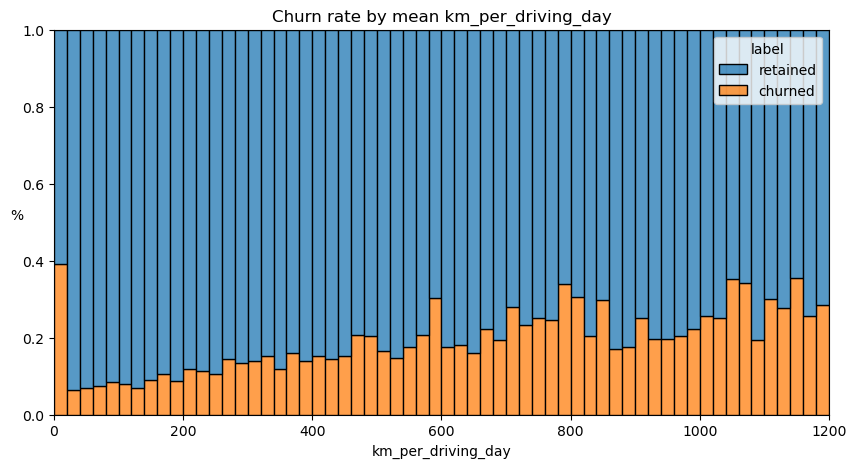

In [73]:
# Histogram
plt.figure(figsize=(10,5))
sns.histplot(data=df, 
             x = 'km_per_driving_day',
             hue = 'label',
             bins = range(0,1201,20),
             multiple='fill')
plt.ylabel('%', rotation = 0)
plt.title('Churn rate by mean km_per_driving_day')
plt.show()

The churn rate tends to increase as the mean daily distance driven increases, confirming what was found in the previous course. It would be worth investigating further the reasons for long-distance users to discontinue using the app.

**`Churn rate per number of driving days`**
*Create another histogram just like the previous one, only this time it should represent the churn rate for each number of driving days.*

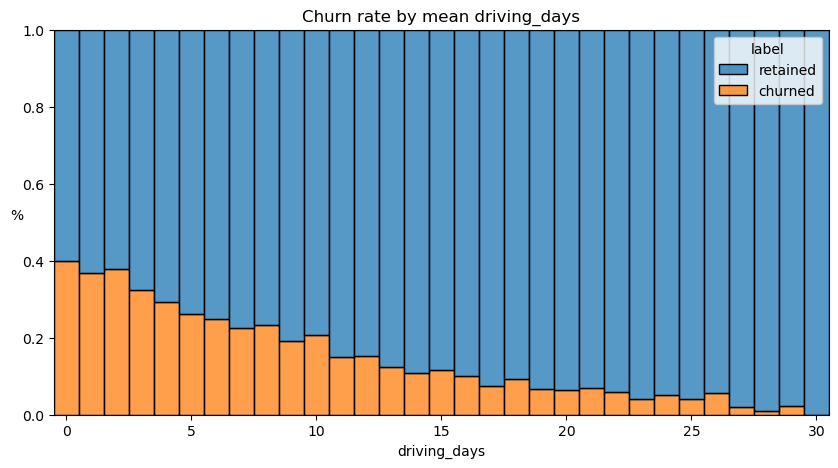

In [76]:
# Histogram
plt.figure(figsize=(10,5))
sns.histplot(data=df, 
             x = 'driving_days',
             bins = range(0,31),
             hue = 'label',
             multiple='fill',
             discrete=True)
plt.ylabel('%', rotation = 0)
plt.title('Churn rate by mean driving_days')
plt.show()

The churn rate is highest for people who didn't use Waze much during the last month. The more times they used the app, the less likely they were to churn. While 40% of the users who didn't use the app at all last month churned, nobody who used the app 30 days churned.

This isn't surprising. If people who used the app a lot churned, it would likely indicate dissatisfaction. When people who don't use the app churn, it might be the result of dissatisfaction in the past, or it might be indicative of a lesser need for a navigational app. Maybe they moved to a city with good public transportation and don't need to drive anymore.

**`Proportion of sessions that occurred in the last month`**
Create a new column `percent_sessions_in_last_month` that represents the percentage of each user's total sessions that were logged in their last month of use.

In [79]:
df['percent_sessions_in_last_month'] = df['sessions']/df['total_sessions']

In [80]:
df['percent_sessions_in_last_month'].median()

0.42309702992763176

Now, create a histogram depicting the distribution of values in this new column.

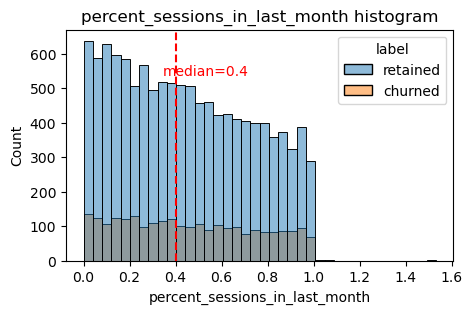

In [82]:
# Histogram
histogrammer('percent_sessions_in_last_month',
             hue = df['label'])

Check the median value of the `n_days_after_onboarding` variable.

In [84]:
df['n_days_after_onboarding'].median()

1741.0

Half of the people in the dataset had 40% or more of their sessions in just the last month, yet the overall median time since onboarding is almost five years.

Make a histogram of `n_days_after_onboarding` for just the people who had 40% or more of their total sessions in the last month.

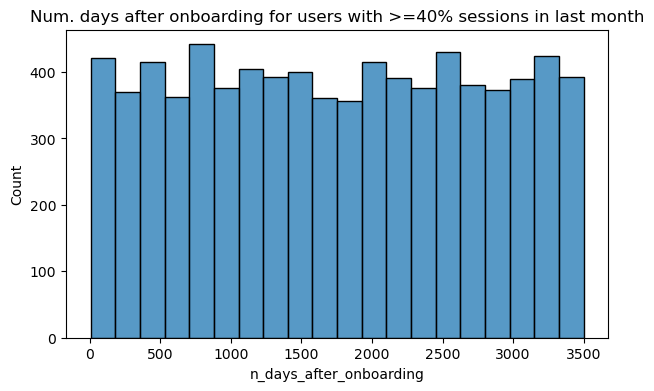

In [86]:
#People who had 40% or more of their total sessions in the last month
data = df.loc[df['percent_sessions_in_last_month'] >= 0.4]
#Graphing
plt.figure(figsize=(7,4))
sns.histplot(x=data['n_days_after_onboarding'])
plt.title('Num. days after onboarding for users with >=40% sessions in last month');

The number of days since onboarding for users with 40% or more of their total sessions occurring in just the last month is a uniform distribution. This is very strange. It's worth asking Waze why so many long-time users suddenly used the app so much in the last month.

### **Task 3b. Handling outliers**
The box plots from the previous section indicated that many of these variables have outliers. These outliers do not seem to be data entry errors; they are present because of the right-skewed distributions.

Depending on what you'll be doing with this data, it may be useful to impute outlying data with more reasonable values. One way of performing this imputation is to set a threshold based on a percentile of the distribution.

To practice this technique, write a function that calculates the 95th percentile of a given column, then imputes values > the 95th percentile with the value at the 95th percentile. such as the 95th percentile of the distribution.

In [89]:
def outlier_imputer(column_name, percentile):
    # Calculate threshold
    threshold = df[column_name].quantile(percentile)
    # Impute threshold for values > than threshold
    df.loc[df[column_name] > threshold, column_name] = threshold

    print('{:>25} | percentile: {} | threshold: {}'.format(column_name, percentile, threshold))


Next, apply that function to the following columns:

    `sessions`
    `drives`
    `total_sessions`
    `driven_km_drives`
    `duration_minutes_drives`

In [91]:
for column in ['sessions', 'drives', 'total_sessions',
               'driven_km_drives', 'duration_minutes_drives']:
               outlier_imputer(column, 0.95)

                 sessions | percentile: 0.95 | threshold: 243.0
                   drives | percentile: 0.95 | threshold: 201.0
           total_sessions | percentile: 0.95 | threshold: 454.3632037399997
         driven_km_drives | percentile: 0.95 | threshold: 8889.7942356
  duration_minutes_drives | percentile: 0.95 | threshold: 4668.899348999998


Call `describe()` to see if your change worked.

In [93]:
df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_driving_day,percent_sessions_in_last_month
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7499.000000,76.568705,64.058204,184.031320,1749.837789,121.605974,29.672512,3939.632764,1789.647426,15.537102,12.179879,578.963113,0.449255
std,4329.982679,67.297958,55.306924,118.600463,1008.513876,148.121544,45.394651,2216.041510,1222.705167,9.004655,7.824036,1030.094384,0.286919
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000,136.238895,0.196221
50%,7499.000000,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000,272.889272,0.423097
75%,11248.500000,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000,558.686918,0.687216
max,14998.000000,243.000000,201.000000,454.363204,3500.000000,1236.000000,415.000000,8889.794236,4668.899349,31.000000,30.000000,15420.234110,1.530637


**Conclusion**
  
Analysis revealed that the overall churn rate is ~17%, and that this rate is consistent between iPhone users and Android users.

Perhaps you feel that the more deeply you explore the data, the more questions arise. This is not uncommon! In this case, it's worth asking the Waze data team why so many users used the app so much in just the last month.

Also, EDA has revealed that users who drive very long distances on their driving days are more likely to churn, but users who drive more often are less likely to churn. The reason for this discrepancy is an opportunity for further investigation, and it would be something else to ask the Waze data team about.

### **Task 4. Results and evaluation**

Use the following two code blocks (add more blocks if you like) to do additional EDA you feel is important based on the given scenario.

In [96]:
df['monthly_drives_per_session_ratio'] = (df['drives']/df['sessions'])

In [97]:
df.head()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device,km_per_driving_day,percent_sessions_in_last_month,monthly_drives_per_session_ratio
0,0,retained,243,201,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android,138.360267,0.953670,0.827160
1,1,retained,133,107,326.896596,1225,19,64,8889.794236,3160.472914,13,11,iPhone,1246.901868,0.406856,0.804511
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android,382.393602,0.841186,0.833333
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone,304.530374,0.724968,0.816327
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android,219.455667,0.499266,0.809524


## **PACE: Execute Stage**

**What key insights emerged from your EDA and visualization(s)?**

Users with lower engagement metrics had higher churn rates

Premium users had significantly lower churn than free users

Certain regions demonstrated higher churn, suggesting external factors

Churn was also correlated with fewer total sessions and shorter durations

**What business and/or organizational recommendations do you propose based on the visualization(s) built?**

Invest in user engagement strategies, especially for free users

Target at-risk users early with personalized messages

Improve service offerings in high-churn regions

Promote premium features through trial campaigns

**How might you share these visualizations with different audiences?**

Create a slide deck for executives with simplified charts and takeaways

Provide interactive dashboards for the product team

Use detailed data tables and plots in technical reports for analysts